# Метрики

In [ ]:
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt

In [ ]:
x, y = make_moons(n_samples=500, noise=0.1, random_state=40)

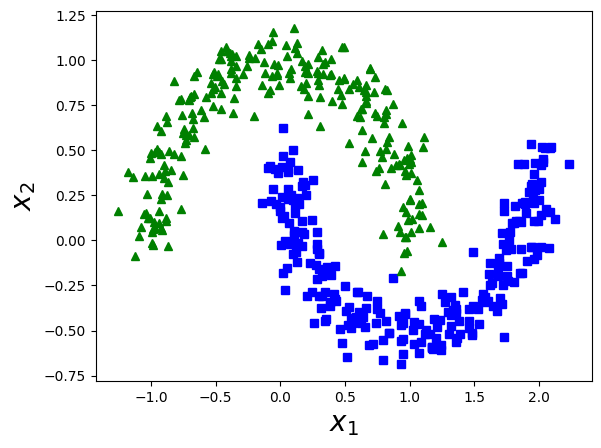

In [ ]:
plt.plot(x[:, 0][y==1], x[:, 1][y==1], "bs")
plt.plot(x[:, 0][y==0], x[:, 1][y==0], "g^")

plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)

plt.show()

# Регрессия

In [ ]:
x1 = x[:, :1][y==0]
x2 = x[:, 1:][y==0]

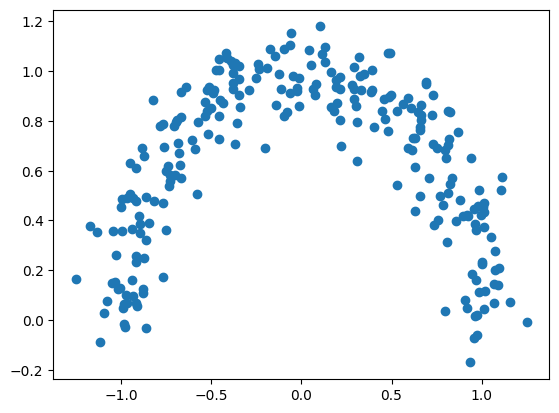

In [ ]:
plt.scatter(x1, x2);

R2: 0.73


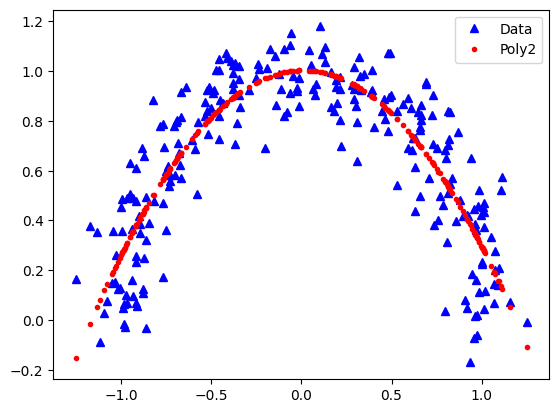

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
polynomial_features = PolynomialFeatures(2)
x_poly = polynomial_features.fit_transform(x1)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, x2)

pred = lin_reg.predict(x_poly)
print(f'R2: {lin_reg.score(x_poly, x2):.2f}')
plt.plot(x1, x2, "b^")
plt.plot(x1, pred, 'r.')
plt.legend(['Data', 'Poly2'])
plt.show()

**MAE** - Mean Absolute Error

Просто интерпретировать, насколько в среднем показатель далек от реального.

$MAE = \frac{1}{n}\sum^{n}_{i=1}|y_i - \hat{y}_i|$


In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(x2, pred)

0.13523421761958407


**MSE** - Mean Squared Error

Чем больше отклонение - тем хуже метрика. Чтобы убрать большие ошибки, но не сильно давить на небольшие, поэтому часто используется

$MSE = \frac{1}{n}\sum^{n}_{i=1}(y_i - \hat{y}_i)^2$


In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(x2, pred)

0.02991611575371089

**RMSE** - Root Mean Squared Error

Почти то же, но проще интерпретировать, поскольку единицы измерения совпадают с оригинальными

$RMSE = \sqrt{\frac{1}{n}\sum^{n}_{i=1}(y_i - \hat{y}_i)^2}$

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

np.sqrt(mean_squared_error(x2, pred))

0.17296275828544966

**RMSELE** - Root Mean Squared Log Error

Похож, но считается через логарифм, что позволяет использовать его для предсказаний признака в **бОльшем** диапазоне, чем MSE

$RMSLE = \sqrt{\frac{1}{n}\sum^{n}_{i=1}((\log{\hat{y}_i + 1}) - (\log{y_i + 1}))^2}$

In [ ]:
from sklearn.metrics import mean_squared_log_error

np.sqrt(mean_squared_log_error(x2 + pred.max(), pred + pred.max()))

0.07178468383619131


**R2** - ака Коэффициент детерминации

Насколько хорошо модель предсказывает значение. Используется внутри встроенного метода ЛР. По сути сравнивает дисперсию предсказания с дисперсией выборки. Но для нелинейных предсказаний может ввести в заблуждение.

$R^2 = 1 - \frac{\sum^n_{i=1}(y_i - \hat{y}_i)^2}{\sum^n_{i=1}(y_i - \bar{y}_i)^2}$


In [ ]:
from sklearn.metrics import r2_score

r2_score(x2, pred)

0.6257676414278207


**MAPE** - Mean Absolute Percentage Error

Похожа на MAE но считает в процентах, насколько возникла ошибка. Используется если нужно предсказать проценты, и среднее отлично от нуля.

$MAPE = \frac{1}{n}\sum_{i=1}^n|\frac{y_i - \hat{y}_i}{y_i}|\times100\%$

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as mape

mape(x2, pred)

0.4497400545611804


**SMAPE** - Symmetric Mean Absolute Percentage Error

Если попадаются нулевые значения - лучше ее, MAPE с нулями не работает.

$SMAPE = \frac{100\%}{n}\sum_{i=1}^n2\cdot\frac{|y_i - \hat{y}_i|}{|y_i| + |\hat{y}_i|}$


In [ ]:
import numpy as np

def smape(d, p):
    return 100/len(d) * np.sum(2 * np.abs(p - d) / (np.abs(d) + np.abs(p)))

smape(x2, pred)

36.67647214720668


**MedAE** - Median Absolute Error

Похожа на MAE, но считает разницу не со средним, а с медианой, поэтому если в датасете есть выбросы - она менее чуствительна к ним

$MedAE = median(|y_1 - \hat{y}_1|, ..., |y_n - \hat{y}_n|)$

In [ ]:
from sklearn.metrics import median_absolute_error

median_absolute_error(x2, pred)

0.10712421302313557

#Классификация

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=3).fit(x,y)
pred = rfc.predict(x)

TP - True Positive
TN - True Negative
FP - False Positive
FN - False Negative

                  Правда
                  +(Собака)      -(Кошка)
    Прогноз   +(Собака)  TP  |  FP
              -(Кошка)  FN  |  TN


**Accuracy (A)**

Доля правильно классифицированных примеров среди всех примеров. Высокое значение Accuracy говорит о хорошей общей производительности модели, но это может быть введено в заблуждение, если классы несбалансированы

$A = \frac{TP + TN}{Total}$

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y, pred)

0.938

**Precision (P)**

Доля правильно классифицированных положительных примеров относительно всех примеров, которые были классифицированы как положительные. Высокая Precision означает меньшее количество ложных положительных прогнозов. Важен если нужно уменьшить ложные срабатывания. Снижает ошибку первого рода


$P = \frac{TP}{TP + FP}$

In [ ]:
from sklearn.metrics import precision_score

precision_score(y, pred)

0.984

**Recall (R)**

True Positive Rate (TPR)

Доля правильно классифицированных положительных примеров относительно всех истинных положительных примеров. Высокий Recall означает меньшее количество ложных отрицательных прогнозов. Важен если много пропусков положительного класса. То есть, снижает ошибку второго рода


$R = \frac{TP}{TP + FN}$

In [ ]:
from sklearn.metrics import recall_score

recall_score(y, pred)

0.9077490774907749


False Positive Rate (FPR)

Доля не правильно классифицированных положительных примеров относительно всех истинных отрицательных примеров.


$FPR = \frac{FP}{FP + TN}$

**F1-score (F1)**

Сбалансированная метрика, объединяющая Precision и Recall. F1-score хорошо подходит для ситуаций, когда классы несбалансированы


$F1 = \frac{2\cdot P \cdot R}{P + R}$

In [ ]:
from sklearn.metrics import f1_score

f1_score(y, pred)

0.9443378119001918

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y, pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94       250
           1       0.91      0.98      0.94       250

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



In [ ]:
from sklearn.metrics import fbeta_score

fbeta_score(y, pred, beta=0.1)

0.9076979742173112


**AUC-ROC**

Receiver Operating Characteristic
Area Under the Curve

Площадь под кривой ROC. AUC-ROC измеряет способность модели различать между классами. Значение близкое к 1 говорит о хорошей разделимости классов. Нужна для сравнения моделй между собой

https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=ru#:~:text=The%20ROC%20curve%20is%20drawn,then%20graphing%20TPR%20over%20FPR.

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(pred, y)

0.945140914291239

![](https://drive.google.com/uc?export=view&id=10ebJvvGBAsXutgId_RtAlzYUel80ND7a)

0.5

                  Правда
                  +      -
    Прогноз   +  3  |  1
              -  1  |  3

TPR = 0.75

FPR = 0.25


![](https://drive.google.com/uc?export=view&id=1FwzGcwsnBAl_I4R-JjVUVx_PmjPCBWjR)

0.2

                  Правда
                  +      -
    Прогноз   +  4  |  1
              -  0  |  3

TPR = 1

FPR = 0.25


0.0

                  Правда
                  +      -
    Прогноз   +  4  |  4
              -  0  |  0

TPR = 1

FPR = 1


![](https://drive.google.com/uc?export=view&id=1lV5xFaeoSdf9R2dzqiGfJcuO7JbWxRLL)